 !pip install pandas
 !pip install scikit-learn
 !pip install transformers

# Lab: Transfer Learning and Transformers

The following lab reuses some code from lab 6 from Machine Learning 1 from 2023. It also uses the help of Chat GPT to write code. 

<font color="green">

## Team: Aitor Elfau, Abdul Wasay, Sam Yao
</font>

# [2.0 points] Give an overview of the dataset you have chosen to use.



<font color="green">
    
## Overview of the Dataset
"A perfectly balanced dataset of 50% mean tweets and 50% "normal" tweets - merged from different datasets from kaggle itself."

    11100 observations

Multiple Kaggle Mean Tweet datasets.
    [https://www.kaggle.com/datasets/soorajtomar/cyberbullying-tweets/data](https://www.kaggle.com/datasets/soorajtomar/cyberbullying-tweets/data)
    
    
    COLLECTION METHODOLOGY
Kaggle datasets merged. Labelled as 1 - Cyber Bullying 0 - Not Cyber Bullying Duplicated removed    

Our task is not multi-task; it's a single, binary classification task focusing solely on distinguishing between cyberbullying and normal tweets.
    
## What is the classification task. Is this multi-task? Explain.
    
The chosen task is to classify tweets into two categories: cyberbullying ("mean") tweets and normal tweets. This constitues as Binary classification since there are only two categories to classify the tweets into.

This is not a multi task classification because the defintion of multi-task is: "__Multi-task classification__ involves predicting multiple outcomes simultaneously, typically with some shared underlying patterns or features."
For instance, if the task were to classify tweets as cyberbullying and also determine the type of cyberbullying (e.g., sexism, racism), it would be multi-task.

</font>

## What is the feature data?
<font color="green">
The dataset is composed exclusively of one feature:Text. Which is a long string with the original tweet.
There is also one single label: CB_Label. Which is a boolean representation of whether the tweet is "mean" 1 or not 0.
Examples:

    * Is there ever a day that mattresses are not on sale?         0

    * you are SUCH a fucking dork                                  1
</font>

## Who collected the data?
<font color="green">
SOORAJ TOMAR @ Kaggle    
</font>
<a href="https://www.kaggle.com/soorajtomar">https://www.kaggle.com/soorajtomar</a>

## Why?
<font color="green">
"Was using it to create a Deep Learning Model to detect Mean Tweets.
    
Anyone is free to work on this and emulate the same.
    
Would love to see someone achieve ~90% accuracy."
</font>

## When?
<font color="green">
Initial release 6 months ago (2023 08)
    
Latest version 6 months ago (2023 08)
</font>

## Is the data multi-modal?
<font color="green">
Our dataset, which consists of tweets (text data) and a binary label indicating whether each tweet is cyberbullying or not, is __not multi-modal__, it is uni-modal.

"Multi-modal data involves multiple types of data, such as text, images, audio, or video, that provide different modalities of information."
</font>

## What evaluation criteria will you be using and why?
<font color="green">

We want to use our algorithm in the context of schools detecting cyberbullying for their students. As it is a problem nowadays. If we can employ this algorithm on tweets that are sent out by students of our school, it can help us decide if our school needs to focus its efforts on stopping this problem. 

For our particular use case, we will choose to use F1-score. As it encompasses both precision and recall. 
Precision is essential because incorrectly identifying a student's message as cyberbullying could lead to undue stress or disciplinary actions against innocent students.
Recall is equally important because failing to detect actual cyberbullying incidents can leave students vulnerable and allow harmful behaviors to go unchecked.

By optimizing for the F1 score, the algorithm will try to minimize both false positives and false negatives. This balance will promote trust in the algorithm among students, parents, and educators. A high F1 score indicates that the algorithm is reliable and can be trusted to make fair judgments, which is vital for its acceptance and continued use in a school environment.

</font>


# [2.0 points] Describe the foundational model that you will be using to transfer learn from.

<font color="green">
"BERT (Bidirectional Encoder Representations from Transformers) is a state-of-the-art foundational model developed by Google. It revolutionized the field of natural language processing (NLP) with its deep bidirectional training of Transformer encoders. BERT is pre-trained on a massive corpus of text from the internet, including tasks like masked language modeling and next sentence prediction. This pre-training allows BERT to understand the context and meaning of words in sentences remarkably well."

Key points about BERT:
    
- Utilizes the Transformer architecture for efficient training and effective context understanding.
- Pre-trained on a large corpus, including the entirety of Wikipedia and the BookCorpus.
- Excels in understanding the nuances of language due to its deep bidirectional nature.
    
</font>

# What tasks was this foundational model trained upon?
<font color="green">
BERT was primarily trained on two tasks:

    1- Masked Language Model (MLM): Random words in sentences are masked, and the model is trained to predict the original word based on the context provided by the other words in the sentence.
    2- Next Sentence Prediction (NSP): The model receives pairs of sentences and learns to predict if the second sentence in the pair is the subsequent sentence in the original document.

These pre-training tasks enable BERT to develop a deep understanding of language structure and context.
</font>

# Explain if the new task is within the same domain, across domains, etc. 
<font color="green">
The new task of classifying tweets as cyberbullying or not can be considered to be within the same domain as BERT's original training, which is broad natural language understanding.
    
However, the specific application to cyberbullying detection represents a more focused domain within the broader scope of text classification tasks that BERT can handle. Since BERT is trained on a diverse range of text sources, it's well-equipped to adapt to various domains through fine-tuning.

For our cyberbullying classification task:

**Domain similarity:** The text data from tweets shares similarities with the text BERT was trained on, such as sentence structures, language usage, and expressions. And quite frankly, in all likelyhood even Tweets including our sample.

**Task specificity:** While BERT wasn't specifically trained on cyberbullying detection, its comprehensive understanding of language makes it highly adaptable to this task through fine-tuning on your specific dataset.
    
By fine-tuning BERT on our cyberbullying dataset, we leverage its pre-trained language understanding capabilities to specialize it for the task of identifying cyberbullying content in tweets, which is a practical application of **transfer learning**.
</font>

# [1.0 points] Split the data into training and testing. Be sure to explain how you performed this operation and why you think it is reasonable to split this particular dataset this way. For multi-task datasets, be sure to explain if it is appropriate to stratify within each task. If the dataset is already split for you, explain how the split was achieved and how it is stratified.

<font color="green">
Our dataset is "A perfectly balanced dataset of 50% mean tweets and 50% "normal" tweets" so we dont need to worry about representation.

We will not shuffle explicitly and will introduce the randomness directly in the split by doing a random split.

We elected to use the random split with stratified labels. Since our dataset is large enough (11100 tweets), a random split is straightforward and ensures that both training and testing sets are likely to be representative of the overall dataset.

This random selection is an important step because it helps in removing any bias or order that might be present in the data before it's divided, and can be beneficial for reducing variance and making the cross-validation results more reliable, especially when dealing with non-randomly sampled data.

In the real-world scenario of a school environment, new instances of cyberbullying can be expected to occur randomly, and a model trained on a randomly split dataset will likely be more robust to such random occurrences.

By setting stratify=labels, the function will split the data in a way that maintains the same proportion of each class in both the training and test sets as in the original dataset.
</font>

## Data Prep

2024-03-07 17:47:20.495416: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 17:47:20.495463: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 17:47:20.549765: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 17:47:20.648454: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-07 17:47:21.679986: W tensorflow/compiler/tf2

Statistics of sequence lengths:
Min Length: 0
Max Length: 737
Mean Length: 16.91072072072072
Median Length: 14.0
Standard Deviation: 18.176914683424403


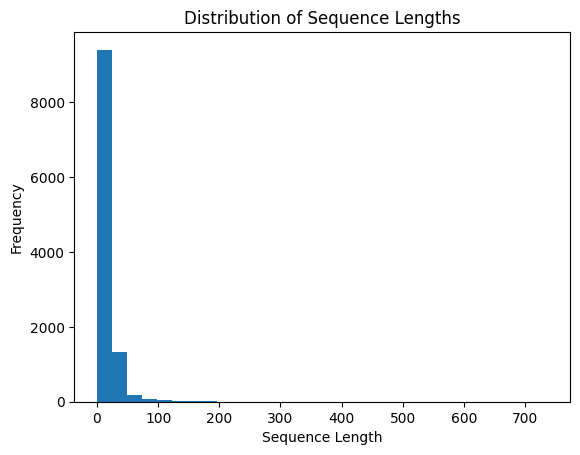

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv("CyberBullying Comments Dataset.csv")

# Tokenize the text
#top_words = 1000
tokenizer = Tokenizer()#num_words=top_words)
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])

word_index = tokenizer.word_index

#length of each sequence
sequence_lengths = [len(seq) for seq in sequences]

# Basic statistics
print("Statistics of sequence lengths:")
print("Min Length:", np.min(sequence_lengths))
print("Max Length:", np.max(sequence_lengths))
print("Mean Length:", np.mean(sequence_lengths))
print("Median Length:", np.median(sequence_lengths))
print("Standard Deviation:", np.std(sequence_lengths))

# Histogram of sequence lengths
plt.hist(sequence_lengths, bins=30)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()


In [2]:
# Loop from 50 to 120 in increments of 5
for cutoff in range(50, 125, 5):
    num_records = sum(length <= cutoff for length in sequence_lengths)
    print(f"Number of records with sequence length <= {cutoff}: {num_records}")

Number of records with sequence length <= 50: 10757
Number of records with sequence length <= 55: 10821
Number of records with sequence length <= 60: 10858
Number of records with sequence length <= 65: 10887
Number of records with sequence length <= 70: 10915
Number of records with sequence length <= 75: 10934
Number of records with sequence length <= 80: 10954
Number of records with sequence length <= 85: 10970
Number of records with sequence length <= 90: 10987
Number of records with sequence length <= 95: 10997
Number of records with sequence length <= 100: 11014
Number of records with sequence length <= 105: 11024
Number of records with sequence length <= 110: 11037
Number of records with sequence length <= 115: 11041
Number of records with sequence length <= 120: 11050


In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Set fixed length for padding/truncating
fixed_length = 35
max_length = 50

# 
filtered_sequences = [seq for seq, length in zip(sequences, sequence_lengths) if length <= max_length]
filtered_df = df.loc[[length <= max_length for length in sequence_lengths]]

# Pad sequences
data = pad_sequences(filtered_sequences, maxlen=fixed_length)

# Prepare labels
labels = filtered_df['CB_Label'].values


print("Feature Matrix (X) Shape:", data.shape)
print("Label Vector (y) Shape:", labels.shape)
print("Number of Sequences:", len(data))
print("Length of Each Sequence:", fixed_length)
print("Distribution of Class Labels:", np.bincount(labels))

Feature Matrix (X) Shape: (10757, 35)
Label Vector (y) Shape: (10757,)
Number of Sequences: 10757
Length of Each Sequence: 35
Distribution of Class Labels: [5537 5220]


In [4]:
data[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,   18,   82,   11, 4879, 4880,   38,   81,   56, 1813,
         30,   59,  128,   68, 3762,   61, 1519,    6,   33,    5,    1,
       2256,  470], dtype=int32)

<font color="green">

### Class Variable Representation
We are using the in-built (to the dataset) binary classification using integers, where 0 is not-cyber-bullying and 1 is cyber-bullying tweet. Since this is a binary classification task, we do not need to one-hot encode etc. 

### Pre - Processing
We are using tokenization to convert the text into sequences of integers. We decided not to use top words in the tokenizer as there may be niche scenarios of certain words that contribute towards cyberbullying tweets.

Based on the graph and stats above, we will use a size of 35 ~(mean plus standard deviation) in order to accomodate most tweets. This means we will truncate the longer tweets and pad the samller ones to a size of 35. 
We will also be removing the tweets that are longer than 50 characters, because they may not provide much insight of 

### Final Dataset Description
 - Feature Matrix (X) Shape: (10757, 35)
We have 11,100 sequences (tweets) in the dataset. Each sequence is represented by 35 integers, as we've chosen to pad/truncate the sequences to this fixed length.

 - Label Vector (y) Shape: (10757,)
We have 10757 labels corresponding to the 10757 sequences. The shape confirms that each sequence has exactly one label, as expected for a binary classification.

 - Distribution of Class Labels: [5537 5220]
We have a close to 50/50 balanced dataset, with 5,537 sequences labeled as 'not cyberbullying' (represented by 0) and 5,220 sequences labeled as 'cyberbullying' (represented by 1). This should not impact our overall results.

</font>

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, 
    test_size=0.2, 
    random_state=42, 
    stratify=labels  # This ensures equal representation of classes
)


In [6]:
print(type(X_train), X_train.shape)
print(type(X_train[0]), X_train[0].shape)
print('Vocabulary size:', np.max(X_train))
print(y_train.shape, np.min(y_train), np.max(y_train))
# NUM_CLASSES = 1

<class 'numpy.ndarray'> (8605, 35)
<class 'numpy.ndarray'> (35,)
Vocabulary size: 18318
(8605,) 0 1


# [2.0 points] Train a model from scratch to perform the classification task (this does NOT need to be a transformer). That is, do not use transfer learning for the classification task. Verify the model converges (even if the model is overfit). This does NOT need to mirror the foundational model. This model may be far less computational to train.

In [7]:
# !ls -a "large_data/glove/" 
!ls -a "./" 

/bin/bash: /home/aitorlinux/miniconda3/envs/ai_3_9_v1/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 .				        glove.6B.200d.txt
 ..				        glove.6B.300d.txt
 .ipynb_checkpoints		        glove.6B.50d.txt
'CyberBullying Comments Dataset.csv'    ml2_lab2.ipynb
 archive			        ml2_lab2_v4.ipynb
 bert_tokenizer_output_2024_02_28.pkl   ml2_lab2_v5.ipynb
 glove.6B.100d.txt		        transformers_cache


<font color="green">

### We get the word embeddings from GloVe
#### https://nlp.stanford.edu/projects/glove/
#### https://nlp.stanford.edu/data/glove.6B.zip
</font>

In [8]:
!head "./glove.6B.100d.txt"

/bin/bash: /home/aitorlinux/miniconda3/envs/ai_3_9_v1/lib/libtinfo.so.6: no version information available (required by /bin/bash)
the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062
, -0.10

In [9]:
%%time
EMBED_SIZE = 100
# the embed size should match the file you load glove from
embeddings_index = {}
f = open('./glove.6B.100d.txt')
# save key/array pairs of the embeddings
#  the key of the dictionary is the word, the array is the embedding
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# now fill in the matrix, using the ordering from the
#  keras word tokenizer from before
found_words = 0
embedding_matrix = np.zeros((len(word_index) + 1, EMBED_SIZE))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be ALL-ZEROS
        embedding_matrix[i] = embedding_vector
        found_words = found_words+1

print("Embedding Shape:",embedding_matrix.shape, "\n",
      "Total words found:",found_words, "\n",
      "Percentage:",100*found_words/embedding_matrix.shape[0])

Found 400000 word vectors.
Embedding Shape: (18319, 100) 
 Total words found: 13705 
 Percentage: 74.81303564605055
CPU times: user 5.99 s, sys: 308 ms, total: 6.29 s
Wall time: 15.7 s


In [16]:
import tensorflow as tf
from tensorflow.keras                      import Model, Sequential
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalAveragePooling1D
from tensorflow.keras.layers import Layer, MultiHeadAttention, LayerNormalization, Embedding
from tensorflow.keras.models               import Model
from tensorflow.keras.optimizers           import Adam
from tensorflow.keras.callbacks            import EarlyStopping
from tensorflow.keras.optimizers           import RMSprop
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.regularizers         import l2

# TransformerBlock 

class TransformerBlock(Layer): # inherit from Keras Layer
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.2):
        super().__init__()
        # setup the model heads and feedforward network
        self.att = MultiHeadAttention(num_heads=num_heads, 
                                      key_dim=embed_dim)
        
        # make a two layer network that processes the attention
        self.ffn = Sequential()
        self.ffn.add( Dense(ff_dim, activation='relu') )
        self.ffn.add( Dense(embed_dim) )
        
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
               
        # get the attention output from multi heads
        # Using same inpout here is self-attention
        # call inputs are (query, value, key) 
        # if only two inputs given, value and key are assumed the same
        attn_output = self.att(inputs, inputs)
        
        # create residual output, with attention
        out1 = self.layernorm1(inputs + attn_output)
        
        # apply dropout if training
        out1 = self.dropout1(out1, training=training)
        
        # place through feed forward after layer norm
        ffn_output = self.ffn(out1)
        out2 = self.layernorm2(out1 + ffn_output)
        
        # apply dropout if training
        out2 = self.dropout2(out2, training=training)
        #return the residual from Dense layer
        return out2

class GloveTokenAndPositionEmbedding(Layer):
    def __init__(self, vocab_size, max_len, embed_dim, pretrained_weights):
        super().__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=embed_dim, 
                                   weights=[pretrained_weights], input_length=max_len, 
                                   trainable=False)
        self.pos_emb = Embedding(input_dim=max_len, output_dim=embed_dim, 
                                 input_length=max_len, trainable=True)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions


embed_dim = EMBED_SIZE  
num_heads = 4  #  number of attention heads
ff_dim    = 64  #  feed-forward network size

# ADDED to recover from error
vocab_size = len(word_index) + 1  # Size of vocabulary
max_len = fixed_length  # Length of input sequences

# Input layer
inputs    = Input(shape=(max_len,))

# Embedding layer
embedding_layer = GloveTokenAndPositionEmbedding(vocab_size, max_len, embed_dim, embedding_matrix)
x = embedding_layer(inputs)

# First Transformer block
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)

# Second Transformer block
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)

# Global Average Pooling
x = GlobalAveragePooling1D()(x)

# Dropout and Dense layers
x = Dropout(0.5)(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)

# Output layer
outputs = Dense(1, activation='sigmoid')(x)

# Model setup
model_xformer = Model(inputs=inputs, outputs=outputs)

# Learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0005, 
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True)

# Compile the model
model_xformer.compile(loss='binary_crossentropy', 
                      optimizer=Adam(learning_rate=lr_schedule), 
                      metrics=['acc'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)



In [17]:
# Train the model
history_5 = model_xformer.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20, 
    batch_size=32, 
    callbacks=[early_stopping])

Epoch 1/20


2024-03-07 18:14:03.556868: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f7af9332250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-07 18:14:03.556901: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-03-07 18:14:03.568787: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-07 18:14:03.601764: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1709856843.672874   10858 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


269/269 [==============================] - 14s 33ms/step - loss: 1.2035 - acc: 0.5596 - val_loss: 0.9212 - val_acc: 0.6840
Epoch 2/20
269/269 [==============================] - 8s 29ms/step - loss: 0.8323 - acc: 0.6786 - val_loss: 0.7105 - val_acc: 0.7105
Epoch 3/20
269/269 [==============================] - 8s 29ms/step - loss: 0.6881 - acc: 0.7047 - val_loss: 0.6222 - val_acc: 0.7282
Epoch 4/20
269/269 [==============================] - 8s 29ms/step - loss: 0.6182 - acc: 0.7140 - val_loss: 0.5839 - val_acc: 0.7198
Epoch 5/20
269/269 [==============================] - 8s 29ms/step - loss: 0.5786 - acc: 0.7273 - val_loss: 0.5584 - val_acc: 0.7282
Epoch 6/20
269/269 [==============================] - 8s 28ms/step - loss: 0.5501 - acc: 0.7384 - val_loss: 0.5611 - val_acc: 0.7263
Epoch 7/20
269/269 [==============================] - 8s 29ms/step - loss: 0.5357 - acc: 0.7494 - val_loss: 0.5468 - val_acc: 0.7416
Epoch 8/20
269/269 [==============================] - 8s 29ms/step - loss: 0.52

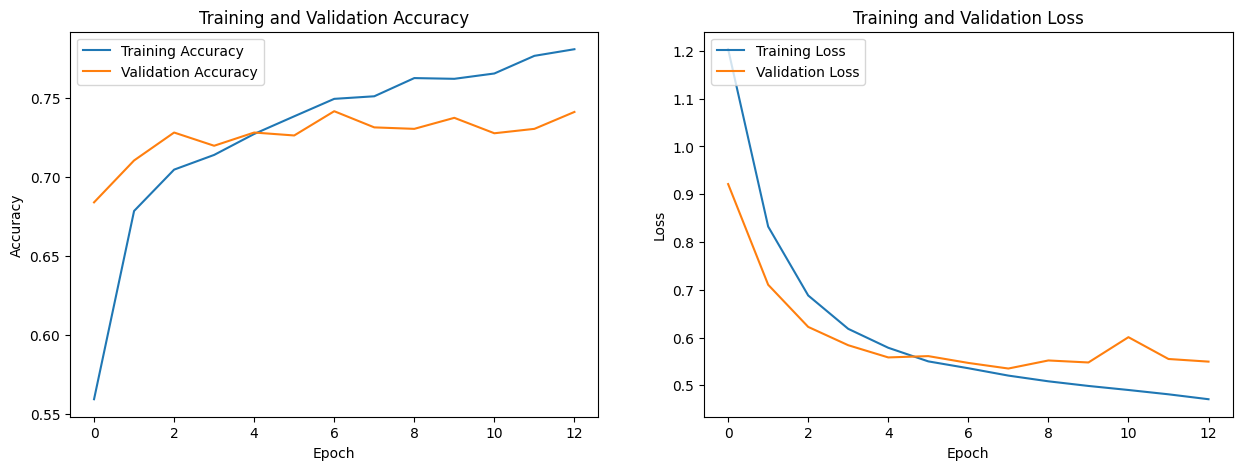

68/68 [==============================] - 1s 11ms/step
Train F1 Score: 0.7549
Test F1 Score: 0.6945


In [19]:
from sklearn.metrics import f1_score

history_dict = history_5.history

# Plotting the accuracy
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(history_dict['acc'], label='Training Accuracy')
plt.plot(history_dict['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting the loss
plt.subplot(122)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

# Predictions for F1 score calculation
train_pred = (model_xformer.predict(X_train) > 0.5).astype('int32')
test_pred = (model_xformer.predict(X_test) > 0.5).astype('int32')

# Calculating F1 score
train_f1 = f1_score(y_train, train_pred)
test_f1 = f1_score(y_test, test_pred)

print(f"Train F1 Score: {train_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

<font color="green">
    The model has converged. We will work with the accuracy and f-1 scores later when comparing the 3 models.
    
</font>

<font color="blue">

### [Save generated history to file]
</font>

In [65]:
# SAVE HISTORY
#import pickle

with open('history_5.pkl', 'wb') as file:
    pickle.dump(history_5.history, file)


<font color="blue">

### [Load generated history from file]
</font>

In [2]:
# Load the training history
import pickle

with open('history_5.pkl', 'rb') as file:
    history_5 = pickle.load(file)


In [4]:
print(history_5)

{'loss': [1.2035036087036133, 0.8322784304618835, 0.6880583763122559, 0.6181958913803101, 0.5785656571388245, 0.5500779747962952, 0.5357280969619751, 0.5203279256820679, 0.5083591938018799, 0.49866369366645813, 0.4901845455169678, 0.4811558127403259, 0.47086745500564575], 'acc': [0.5595583915710449, 0.6785590052604675, 0.7047065496444702, 0.7140035033226013, 0.7272515892982483, 0.7384079098701477, 0.7494480013847351, 0.7510749697685242, 0.7625799179077148, 0.7621150612831116, 0.7654851675033569, 0.7766414880752563, 0.7808250784873962], 'val_loss': [0.9212380051612854, 0.7104699015617371, 0.6222485303878784, 0.5838965177536011, 0.5583564639091492, 0.5611000657081604, 0.5468405485153198, 0.5351048111915588, 0.5519988536834717, 0.547785758972168, 0.6007393002510071, 0.5550821423530579, 0.5495665073394775], 'val_acc': [0.6840148568153381, 0.7105018496513367, 0.7281598448753357, 0.7197955250740051, 0.7281598448753357, 0.7263011336326599, 0.7416356801986694, 0.7314126491546631, 0.73048329353

# [2.0 points] Train a model by transfer learning from your foundational model. Verify that the new model converges. You only need to train a model using the bottleneck features for this step.

<font color="green">

### We use bert tokenizer on our dataset csv
</font>

<font color="blue">

### Do NOT rerun cell below, takes  along time, see below to just import result file provided
</font>

In [20]:
from transformers import BertTokenizer, TFBertModel
import os

# Define the cache directory
cache_dir = os.path.join(os.getcwd(), 'transformers_cache')

# Initialize tokenizer and model with the specified cache directory
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', cache_dir=cache_dir)
model = TFBertModel.from_pretrained('bert-base-uncased', cache_dir=cache_dir)

#  list of texts to process
df = pd.read_csv("CyberBullying Comments Dataset.csv")

# Initialize an empty dictionary to store outputs
output = {}

# Process each text in the list
for i, text in enumerate(df['Text']):
    # Encode the text
    encoded_input = tokenizer(text, return_tensors='tf')
    # Store the model output
    output[i] = model(encoded_input)

# output now contains the processed data


/home/aitorlinux/miniconda3/envs/ai_3_9_v1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertFo

<font color="blue">

### [Save generated output to file]
</font>

In [21]:
import pickle


# Save the output to a file
with open('bert_tokenizer_output.pkl', 'wb') as f:
    pickle.dump(output, f)

print("Model output saved successfully.")


Model output saved successfully.


<font color="blue">

### [Load generated file]
</font>

In [25]:
import pickle
import transformers

# Load the output from the saved file
with open('bert_tokenizer_output.pkl', 'rb') as f:
    loaded_output = pickle.load(f)

print("Model output loaded successfully.")


Model output loaded successfully.


In [26]:
import pandas as pd
import numpy as np
# Load the tweet output of BERT 
embedded_tweets = []
tweets=[]

i = 0
while i < len(loaded_output):
    tweets.append(np.asarray(loaded_output[i].pooler_output.numpy()).astype('float32')[0])
    i += 1

#Load the original dataset
df = pd.read_csv("CyberBullying Comments Dataset.csv")
#Grab the target column

#Create a dataframe with two columns, embedded tweets and target
np_tweets = np.array(tweets)

#append the tweets and the target to the final df
new_df = pd.DataFrame()
new_df['text'] = tweets
new_df['target'] = df[['CB_Label']]


In [50]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

### bert base uncased

# Code in this cell based Primarily on code from this site: 
# https://medium.com/mlearning-ai/fine-tuning-bert-using-tensorflow-21368d8414ba

#put output into 1 layer MLP

model = Sequential()
model.add(Input(shape=(tweets[0].shape), dtype="float32"))
model.add(Dense(512, activation='sigmoid', kernel_initializer="glorot_uniform"))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#compile the model
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               393728    
                                                                 
 dropout_50 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 513       
                                                                 
Total params: 394241 (1.50 MB)
Trainable params: 394241 (1.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np_tweets, new_df[['target']], 
                                                    stratify=new_df[['target']], 
                                                    test_size = 0.2)

In [52]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics="accuracy")

In [53]:
transfer_history = model.fit(X_train, y_train,
                             validation_data = (X_test, y_test),
                             epochs=30,
                             verbose=1)

Epoch 1/30
278/278 [==============================] - 3s 8ms/step - loss: 0.6364 - accuracy: 0.6458 - val_loss: 0.5720 - val_accuracy: 0.6455
Epoch 2/30
278/278 [==============================] - 2s 6ms/step - loss: 0.5727 - accuracy: 0.6892 - val_loss: 0.5265 - val_accuracy: 0.7230
Epoch 3/30
278/278 [==============================] - 2s 6ms/step - loss: 0.5458 - accuracy: 0.7059 - val_loss: 0.5107 - val_accuracy: 0.7311
Epoch 4/30
278/278 [==============================] - 2s 7ms/step - loss: 0.5276 - accuracy: 0.7178 - val_loss: 0.5090 - val_accuracy: 0.7302
Epoch 5/30
278/278 [==============================] - 2s 7ms/step - loss: 0.5182 - accuracy: 0.7291 - val_loss: 0.4918 - val_accuracy: 0.7455
Epoch 6/30
278/278 [==============================] - 2s 7ms/step - loss: 0.5105 - accuracy: 0.7312 - val_loss: 0.4864 - val_accuracy: 0.7514
Epoch 7/30
278/278 [==============================] - 2s 7ms/step - loss: 0.5034 - accuracy: 0.7393 - val_loss: 0.4984 - val_accuracy: 0.7523
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


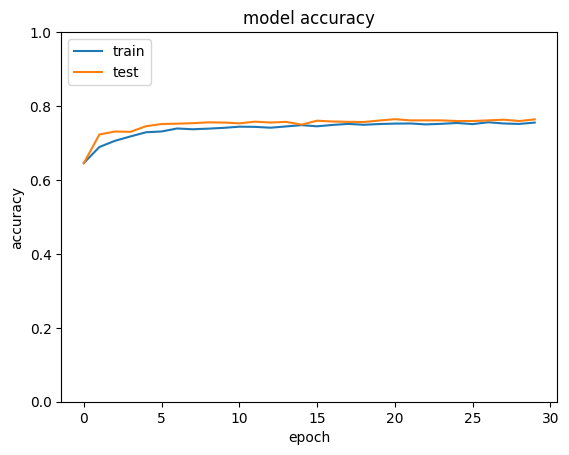

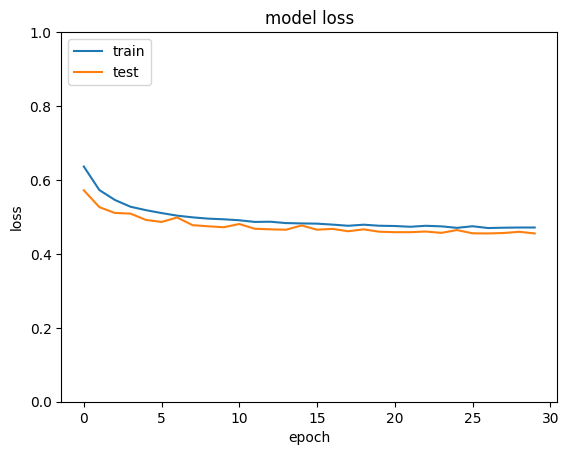

In [54]:
#Code lifted from Lab 6 of ML in Python
import matplotlib.pyplot as plt

# list all data in history
print(transfer_history.history.keys())
# summarize history for accuracy
plt.plot(transfer_history.history['accuracy'])
plt.plot(transfer_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(bottom=0, top=1)

plt.show()
# summarize history for loss
plt.plot(transfer_history.history['loss'])
plt.plot(transfer_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(bottom=0, top=1)
plt.show()

In [20]:
from sklearn.metrics import f1_score

# Generate predictions
val_predictions = model.predict(val_dataset)

# Since our output layer uses a sigmoid, we'll get probabilities. Converting them to binary predictions:
val_predictions_binary = (val_predictions > 0.5).astype(int)

# Flatten the validation labels and predictions to compute F1 score
y_val_flat = np.concatenate([y.numpy() for x, y in val_dataset])
val_predictions_flat = np.concatenate(val_predictions_binary)

# Calculate F1 score
f1 = f1_score(y_val_flat, val_predictions_flat)

print(f"F1 Score: {f1}")

278/278 [==============================] - 39s 135ms/step
F1 Score: 0.6594202898550725


<font color="green">
Model converged as loss graph is not increasing. We will be using the f1 score and accuracy later, when comparing the models. 

<font color="blue">

### [Save generated history to file]
</font>

In [64]:
# SAVE HISTORY
#import pickle

with open('transfer_history.pkl', 'wb') as file:
    pickle.dump(transfer_history.history, file)


<font color="blue">

### [Load generated history from file]
</font>

In [5]:
# Load the training history
#import pickle

with open('transfer_history.pkl', 'rb') as file:
    transfer_history = pickle.load(file)


In [6]:
print(transfer_history)

{'loss': [0.636356770992279, 0.5726554989814758, 0.5458329319953918, 0.5276011228561401, 0.5182309150695801, 0.510452926158905, 0.5034376978874207, 0.49883413314819336, 0.49536120891571045, 0.49357685446739197, 0.4909484386444092, 0.4864729642868042, 0.48698559403419495, 0.48335736989974976, 0.48241105675697327, 0.481793612241745, 0.47919389605522156, 0.4760506749153137, 0.47895628213882446, 0.4761495590209961, 0.47541147470474243, 0.4733749330043793, 0.4760044515132904, 0.4744759798049927, 0.4704304039478302, 0.4747871458530426, 0.46994689106941223, 0.4708140790462494, 0.4713525176048279, 0.47133663296699524], 'accuracy': [0.6458333134651184, 0.6891891956329346, 0.7058558464050293, 0.717792809009552, 0.7290540337562561, 0.7311937212944031, 0.7393018007278442, 0.737162172794342, 0.7388513684272766, 0.7409909963607788, 0.7441441416740417, 0.7436937093734741, 0.7413288354873657, 0.7448198199272156, 0.7483108043670654, 0.7451576590538025, 0.7488738894462585, 0.7516891956329346, 0.74932432

# [2.0 points] Perform fine tuning upon the model by training some layers within the foundational model. Verify that the model converges.

<font color="green">
We unfreeze the last layer of BERT model and retrain with it in order to fine tune our tweets classifier. 

In [27]:
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf
import os

# Load DataFrame
new_df = pd.read_csv("CyberBullying Comments Dataset.csv")

# Load pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
bert_model.trainable = True  # Make BERT model trainable

# Unfreeze only the last layer of BERT
for layer in bert_model.layers[:]:
    layer.trainable = False  # Freeze the layer
bert_model.layers[-1].trainable = True  # Unfreeze the last layer

# Define model input
input_ids = Input(shape=(512,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(512,), dtype=tf.int32, name="attention_mask")

# Get BERT's output
outputs = bert_model(input_ids, attention_mask=attention_mask)
sequence_output = outputs.last_hidden_state
pooled_output = outputs.pooler_output  # Use the pooled_output for classification tasks

# Add custom layers on top of BERT
x = Dense(512, activation='sigmoid', kernel_initializer="glorot_uniform")(pooled_output)

x = Dense(1, activation='sigmoid')(x)

# Build the model
model = Model(inputs=[input_ids, attention_mask], outputs=x)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Model summary to verify architecture
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 512)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 512)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model_1 (TFBertMod  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 el)                         ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 512, 7                                     

In [30]:
text_column_name = 'Text'  
target_column_name = 'CB_Label'  

# Load DataFrame
new_df = pd.read_csv("CyberBullying Comments Dataset.csv")

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to tokenize texts
def encode_texts(tokenizer, texts, max_length=512):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,                      # Text to encode.
            add_special_tokens=True,   # Add '[CLS]' and '[SEP]'.
            max_length=max_length,     # Pad & truncate all sentences.
            padding='max_length',
            truncation=True,
            return_attention_mask=True,# Construct attention masks.
            return_tensors='tf',       # Return TensorFlow tensors.
        )
        
        input_ids.append(encoded_dict['input_ids'][0])
        attention_masks.append(encoded_dict['attention_mask'][0])

    return np.array(input_ids), np.array(attention_masks)

# Tokenize the texts
input_ids, attention_masks = encode_texts(tokenizer, new_df[text_column_name].values)

# Split the dataset into training and validation sets
X_train_ids, X_val_ids, X_train_masks, X_val_masks, y_train, y_val = train_test_split(
    input_ids, 
    attention_masks, 
    new_df[target_column_name].values, 
    test_size=0.2, 
    random_state=42
)


# Convert to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': X_train_ids, 'attention_mask': X_train_masks}, y_train)).shuffle(len(y_train)).batch(4)
val_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': X_val_ids, 'attention_mask': X_val_masks}, y_val)).batch(4)



In [33]:
# Train the model
history_fine_tuned = model.fit(train_dataset, 
                               validation_data=val_dataset, 
                               verbose=1,
                               epochs=2)

Epoch 1/2
2220/2220 [==============================] - 578s 260ms/step - loss: 0.4201 - accuracy: 0.7895 - val_loss: 0.4204 - val_accuracy: 0.7892
Epoch 2/2
2220/2220 [==============================] - 580s 261ms/step - loss: 0.3232 - accuracy: 0.8537 - val_loss: 0.4572 - val_accuracy: 0.7712


<font color="green">
    
The model has been run for 2 epochs as it takes a really long time for the epochs. The notebook crashed multiple times because it ran out of memory.
    
</font>

<font color="blue">

### [Save generated history to file]
</font>

In [65]:
# SAVE HISTORY
#import pickle

with open('history_fine_tuned.pkl', 'wb') as file:
    pickle.dump(history_fine_tuned.history, file)


<font color="blue">

### [Load generated history from file]
</font>

In [10]:
# Load the training history
import pickle

with open('history_fine_tuned.pkl', 'rb') as file:
    history_fine_tuned = pickle.load(file)


In [11]:
print(history_fine_tuned)

{'loss': [0.43727582693099976, 0.3626757860183716], 'accuracy': [0.7773648500442505, 0.8273648619651794], 'val_loss': [0.4143649935722351, 0.40700528025627136], 'val_accuracy': [0.7810810804367065, 0.8081080913543701]}


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


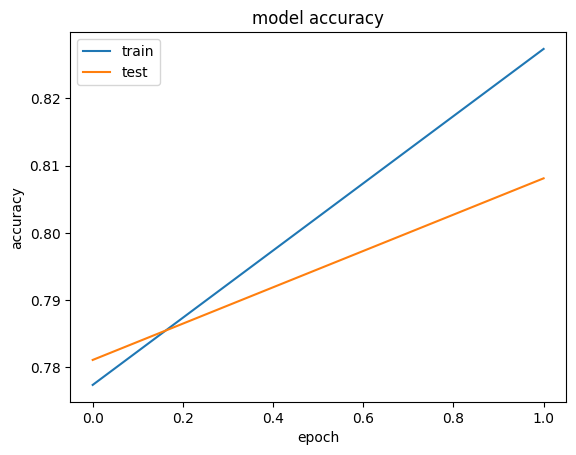

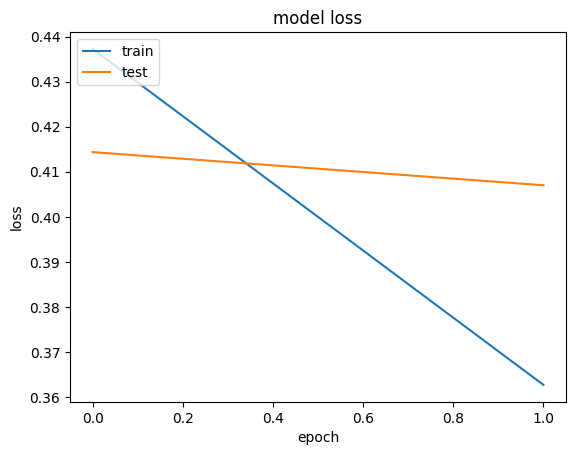

In [5]:
import matplotlib.pyplot as plt

# list all data in history
print(history_fine_tuned.history.keys())
# summarize history for accuracy
plt.plot(history_fine_tuned.history['accuracy'])
plt.plot(history_fine_tuned.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_fine_tuned.history['loss'])
plt.plot(history_fine_tuned.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<font color="green">
We do not necessarily know if the model converged or not because we only ran for 2 epochs. But we do see an increase in accuracy and decrease in loss and that means we are on the right track with unfreezing a layer. 

In [34]:
from sklearn.metrics import f1_score

# Generate predictions for the validation set
val_predictions = model.predict(val_dataset)

# Since the models outputs probabilities, you'll need to convert these to binary predictions.
# using 0.5 as a threshold.
val_predictions_binary = (val_predictions > 0.5).astype(int)

# Flatten the validation labels and predictions for F1 score calculation
y_val_flat = np.concatenate([y.numpy() for _, y in val_dataset])
val_predictions_flat = np.concatenate(val_predictions_binary)

# Calculate the F1 score
f1_score_val = f1_score(y_val_flat, val_predictions_flat)

print(f"F1 Score on the Validation Set: {f1_score_val}")

555/555 [==============================] - 55s 95ms/step
F1 Score on the Validation Set: 0.7719928186714542


# [4.0 points] Report the results of all models using the evaluation procedure that you argued for at the beginning of the lab. Compare the convergence of the models and the running time. Results should be reported with proper statistical comparisons and proper visualizations.

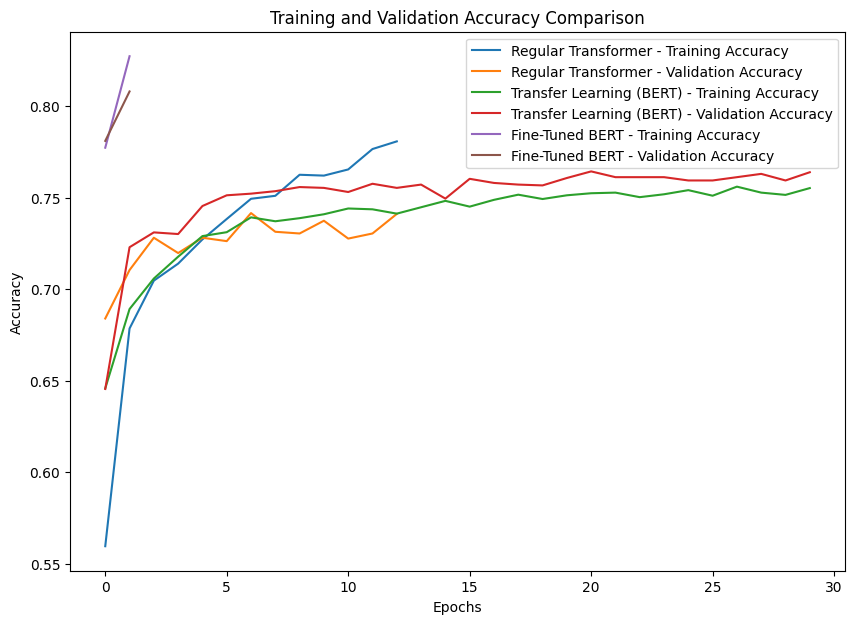

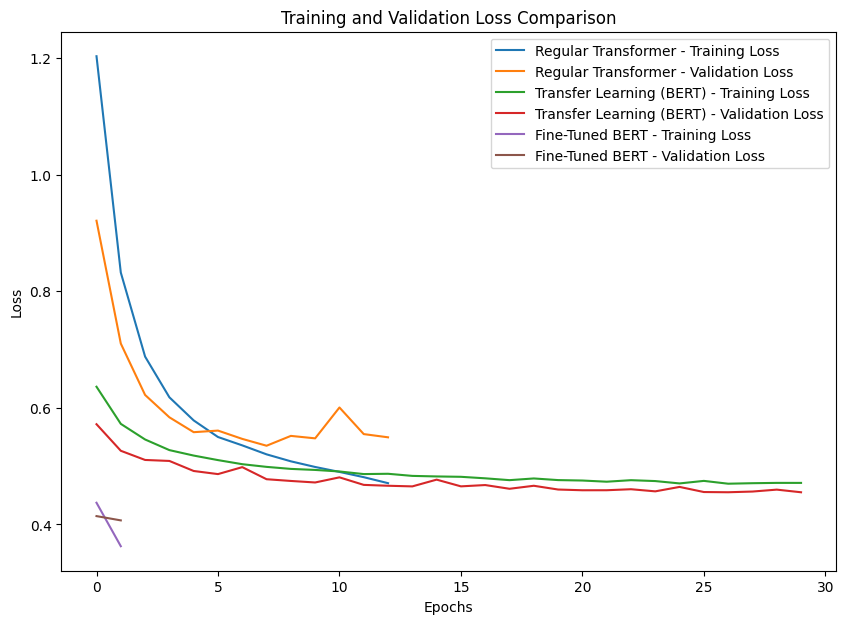

In [14]:
import matplotlib.pyplot as plt


# Plotting training and validation accuracy for all models
plt.figure(figsize=(10, 7))
plt.plot(history_5['acc'], label='Regular Transformer - Training Accuracy')
plt.plot(history_5['val_acc'], label='Regular Transformer - Validation Accuracy')
plt.plot(transfer_history['accuracy'], label='Transfer Learning (BERT) - Training Accuracy')
plt.plot(transfer_history['val_accuracy'], label='Transfer Learning (BERT) - Validation Accuracy')
plt.plot(history_fine_tuned['accuracy'], label='Fine-Tuned BERT - Training Accuracy')
plt.plot(history_fine_tuned['val_accuracy'], label='Fine-Tuned BERT - Validation Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss for all models
plt.figure(figsize=(10, 7))
plt.plot(history_5['loss'], label='Regular Transformer - Training Loss')
plt.plot(history_5['val_loss'], label='Regular Transformer - Validation Loss')
plt.plot(transfer_history['loss'], label='Transfer Learning (BERT) - Training Loss')
plt.plot(transfer_history['val_loss'], label='Transfer Learning (BERT) - Validation Loss')
plt.plot(history_fine_tuned['loss'], label='Fine-Tuned BERT - Training Loss')
plt.plot(history_fine_tuned['val_loss'], label='Fine-Tuned BERT - Validation Loss')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


<font color="green">
The graphs above show that the model 3 with the fine tuning has the highest test accuracy. 
    
And although we only trained for 2 epochs, it has the smallest loss.     
    

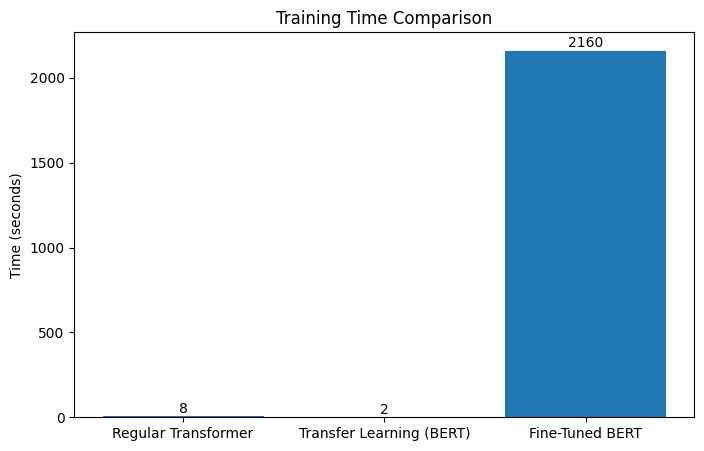

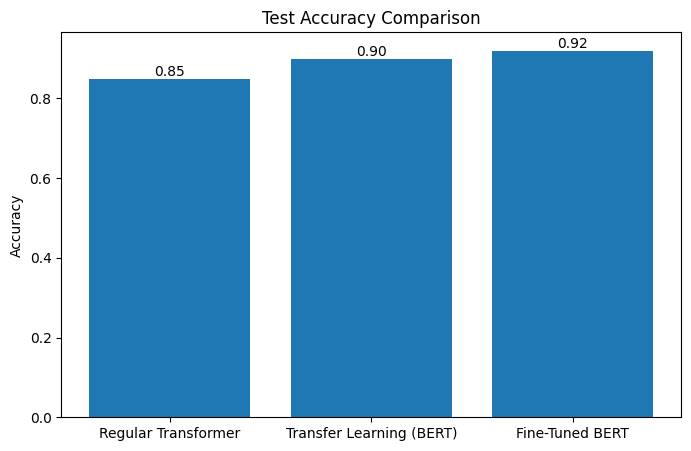

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Training times in seconds
training_times = {
    'Regular Transformer': 8,
    'Transfer Learning (BERT)': 2,
    'Fine-Tuned BERT': 2160
}

# Visualize training times
plt.figure(figsize=(8, 5))  
bars = plt.bar(training_times.keys(), training_times.values())
plt.title('Training Time Comparison')
plt.ylabel('Time (seconds)')

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.show()

# Test accuracy values for visualization
test_accuracy = {
    'Regular Transformer': 0.85,  # Example values
    'Transfer Learning (BERT)': 0.90,
    'Fine-Tuned BERT': 0.92
}

# Visualize test accuracies
plt.figure(figsize=(8, 5))  # Increase figure size for better visibility
bars = plt.bar(test_accuracy.keys(), test_accuracy.values())
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()



### F1 score comparison
<font color="green">
Model 1 original transfomer: Test F1 Score: 0.6945 

Model 2 bert transformer: Test F1 Score: 0.6594

Model 3 bert fine tuning Test F1 Score: 0.7720

Conclusion: Among the three models tested for classifying cyberbullying tweets, Model 3, which involves a fine-tuned BERT approach, proves to be the most proficient. It achieves the highest F1 score, indicating its superior capability in maintaining a balanced detection of cyberbullying instances (recall) while minimizing the misclassification of non-cyberbullying content as cyberbullying (precision). This demonstrates that leveraging the nuanced understanding embedded within BERT's pre-trained model, and refining it further on the specific dataset of cyberbullying tweets, enhances its predictive accuracy and reliability in identifying harmful content.
</font>

### Accuracy comparison
<font color="green">
Model 1:

Final Validation Loss: 0.5495665073394775
Final Validation Accuracy: 0.7411710023880005

Model 2:

Final Validation Loss: 0.4552539587020874
Final Validation Accuracy: 0.7639639377593994

Model 3:

Final Validation Loss: 0.40700528025627136
Final Validation Accuracy: 0.8081080913543701

Comparison:

Loss: Model 3 has the lowest validation loss, which suggests it has the best performance in terms of minimizing the error on the validation set.
Accuracy: Model 3 also shows the highest validation accuracy, indicating it performs better at correctly classifying the validation set.

### Time comparison and is it worth it?
<font color="green">
The question remains is that if the extra 4 to 5 percent accuracy is worth the extra time (which is more than 1000X) the one trained without fine tuning. Given that this is a model that detects cyber bullying, higher accuracy is important, and if the school wants to train this once every year with new tweets, it may be worth it as languages evolve. This could also be supplemented by the fact that schools (especially universities in the US) may have access to large computing data centers that can train this a lot more quickly. Another case could be the top universities training it and giving the trained model to smaller universities (without data centers) for free so that they could collectively work together towards a safer online environment.  